# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Nic Vetter  |  GitHub Repo: https://github.com/VetterNic/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

# Answer to Question 1 below:

In [21]:
import requests
import pickle
from bs4 import BeautifulSoup

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    article_content = soup.find("article")
    article_html = str(article_content)
    
    with open("article_html.pkl", "wb") as file:
        pickle.dump(article_html, file)
        
    print("Article HTML extracted and saved to 'article_html.pkl'")
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

Article HTML extracted and saved to 'article_html.pkl'


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

# Answer to Question 2 below:

In [24]:
from bs4 import BeautifulSoup

# Read the HTML content from the file
with open("article_html.pkl", "rb") as file:
    article_html = file.read().decode('latin1')  # Decode using 'latin1' encoding

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract text from the parsed HTML
article_text = soup.get_text()

# Print the text
print(article_text)

â¬â¢oQ      XhQ  

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights arenÃ¢â¬â¢t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesnÃ¢â¬â¢t mean there arenÃ¢â¬â¢t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWMÃ¢â¬â¢s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase Ã¢â¬Ålaser headlightsÃ¢â¬Â is that of laser beams firing out the front of an automobile. Obviously, coherent beams of mo

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Answer to Question 3 below:

In [5]:
import requests
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import string

# HTML Extraction
def extract_text_from_html(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    article_content = soup.find("article")
    return article_content.get_text(separator=" ", strip=True)

# Load the HTML content from the file
with open("article_html.pkl", "rb") as file:
    article_html = file.read().decode('latin1')  # Decode using 'latin1' encoding

# Extract text from the HTML content
article_text = extract_text_from_html(article_html)

# Check if the text extraction was successful
if article_text:
    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Process the article text using spaCy
    doc = nlp(article_text)

    # Filter out punctuation and stopwords
    filtered_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    # Count the frequencies of each token
    token_freq = Counter(filtered_tokens)

    # Get the 5 most frequent tokens
    most_common_tokens = token_freq.most_common(5)

    # Print the common tokens
    print("Top 5 most frequent tokens:")
    for token, freq in most_common_tokens:
        print(f"{token}: {freq}")

    # Print all tokens and their frequencies
    print("\nAll tokens and their frequencies:")
    for token, freq in token_freq.items():
        print(f"{token}: {freq}")
else:
    print("Failed to extract text from the HTML.")


Top 5 most frequent tokens:
laser: 33
headlights: 18
headlight: 11
technology: 10
led: 10

All tokens and their frequencies:
laser: 33
headlights: 18
work: 2
130: 1
comments: 1
lewin: 1
day: 3
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
arenã¢â¬â¢t: 2
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
doesnã¢â¬â¢t: 2
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
bwmã¢â¬â¢s: 2
prototype: 1
headlight: 11
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
ã¢â¬ålaser: 1
headlightsã¢â¬â: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
ey

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Answer to Question 4 below:

In [7]:
import spacy
from collections import Counter
import string

# Loading Model
nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

# Getting rid of things we don't want
filtered_lemmas = [token.lemma_.lower() for token in doc if token.lemma_.lower() not in nlp.Defaults.stop_words and token.lemma_.lower() not in string.punctuation and not token.is_space]

# Count the frequencies of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

print("Top 5 most frequent lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"{lemma}: {freq}")
    
print("\nAll lemmas and their frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas:
laser: 38
headlight: 27
beam: 12
technology: 10
light: 10

All lemmas and their frequencies:
laser: 38
headlights: 2
work: 3
130: 1
comments: 1
lewin: 1
day: 4
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
headlight: 27
arenã¢â¬â¢t: 2
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
doesnã¢â¬â¢t: 2
mean: 2
thousand: 1
engineer: 2
world: 2
improve: 1
state: 2
art: 1
lighting: 4
seal: 1
beam: 12
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
bwmã¢â¬â¢s: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
ã¢â¬ålaser: 1
headlightsã¢â¬â: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 10
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
donã¢â¬â¢t: 2
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
i

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

# Answer to Question 5 below:

In [13]:
import re

def score_sentence_by_token(sentence, interesting_tokens):
    tokens = re.findall(r'\b\w+(?:\'\w+)?\b', sentence.lower())
    score = sum(1 for token in tokens if token in interesting_tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = re.findall(r'\b\w+(?:\'\w+)?\b', sentence.lower())
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

first_sentence = "When we think about the onward march of automotive technology, headlights aren't usually the first thing that come to mind." # first sentence in the article
interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"] # frequent tokens from question 3
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"] #frequent lemmas from question 4

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)



Token score: 0.1
Lemma score: 0.05


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Answer to Question 6 below:

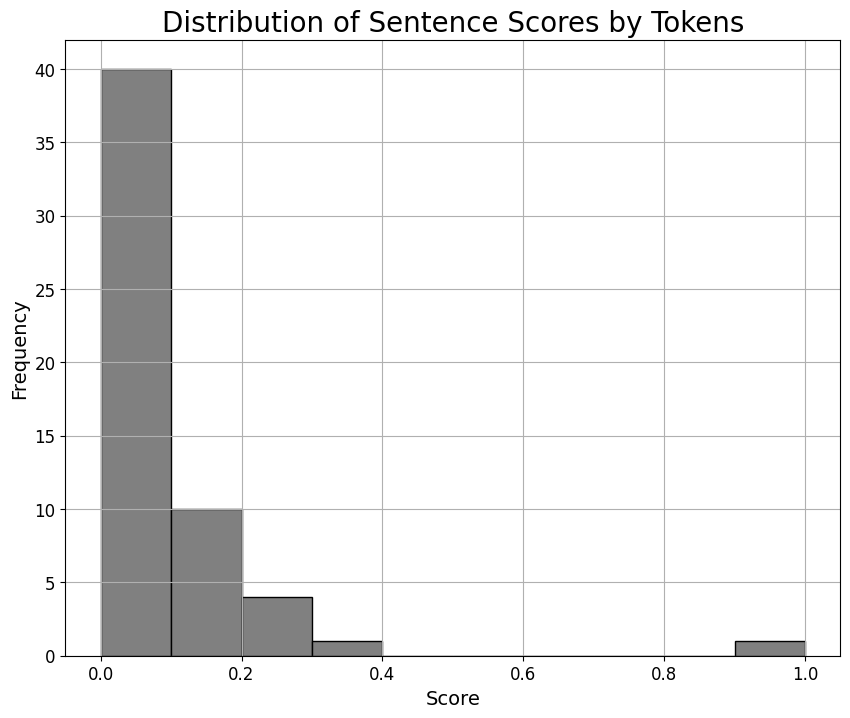

In [29]:
import re
import matplotlib.pyplot as plt

# Token Scoring Function
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = re.findall(r'\b\w+(?:\'\w+)?\b', sentence.lower())
    score = sum(1 for token in tokens if token in interesting_tokens) / len(tokens)
    return score

# Sentence Extraction
sentences = re.split(r'\.\s|\!\s|\?\s', article_text)

# Score Calcs
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Hist
plt.figure(figsize=(10, 8))
plt.hist(scores, bins=10, color='gray', edgecolor='black')
plt.title('Distribution of Sentence Scores by Tokens', fontsize=20)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Answer to Question 7 below:

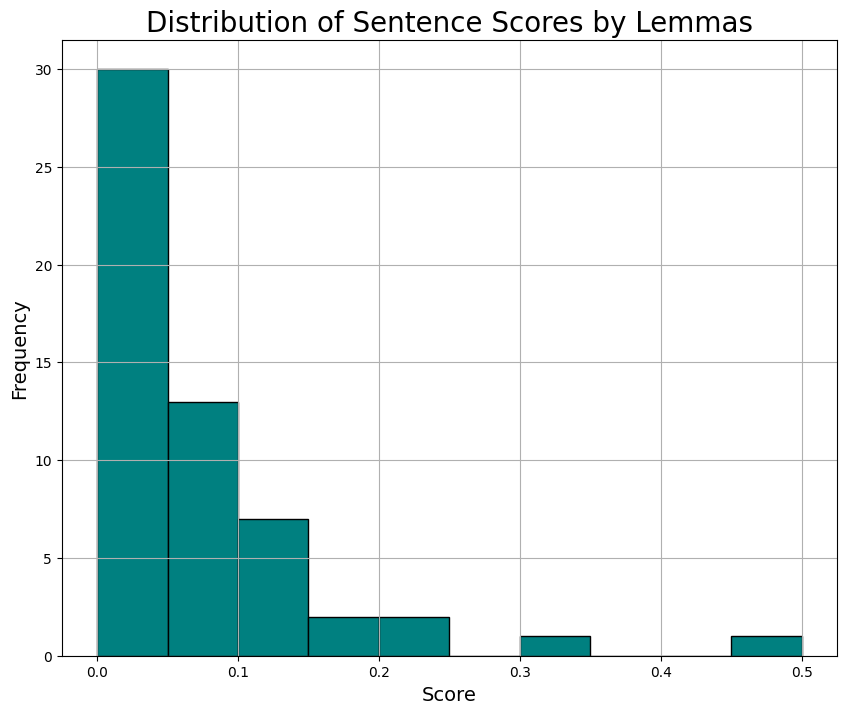

In [30]:
import re
import matplotlib.pyplot as plt

# Lemma Scoring Function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = re.findall(r'\b\w+(?:\'\w+)?\b', sentence.lower())
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score


sentences = re.split(r'\.\s|\!\s|\?\s', article_text)

# Score Calcs using Lemmas
scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Hist
plt.figure(figsize=(10, 8))
plt.hist(scores, bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Sentence Scores by Lemmas', fontsize=20)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Answer: 

First we would need to get rid of the following parts of speech for both methods: 

descriptive adjectives, verbs, adverbs, prepositions, articles and we will need to make a decision of whether we want to also included ProNouns in the generated lists. 

For the Lemmas, we would only count the root/base word(lemma), but other than that, it will be a pretty similar process to what I mentioned in the previous line. 

The code adjustments will have to reflect this by using spaCy to tag each word with the POS tag. This will make sure that we will only keep the nouns with the Token method and the noun root word with the lemmas method. 

Without spaCy, or a similar tool, this would be super slow and painful for the analyst, spaCy is a great tool for analyzing articles and I find it pretty interesting to work with.

Thank you for reading! Nic